In [1]:
# importing all the libraries needed

import yfinance as yf
import pandas as pd
import os
from datetime import datetime

from sklearn.model_selection import TimeSeriesSplit, GridSearchCV

from ta.momentum import RSIIndicator
from ta.trend import MACD, EMAIndicator
from ta.volatility import AverageTrueRange

import numpy as np
import lightgbm as lgb

from sklearn.metrics import roc_auc_score

In [3]:
# Creating folder to store data

data_dir = '../data/nse100'
os.makedirs('../data/nse100', exist_ok=True)

In [4]:
# Adding NSE tickers to the data

nse100_tickers = [
    "ADANIENT.NS", "ADANIPORTS.NS", "AMBUJACEM.NS", "APOLLOHOSP.NS", "ASIANPAINT.NS",
    "AUROPHARMA.NS", "AXISBANK.NS", "BAJAJ-AUTO.NS", "BAJFINANCE.NS", "BAJAJFINSV.NS",
    "BAJAJHLDNG.NS", "BANDHANBNK.NS", "BANKBARODA.NS", "BERGEPAINT.NS", "BHARATFORG.NS",
    "BHARTIARTL.NS", "BIOCON.NS", "BOSCHLTD.NS", "BPCL.NS", "BRITANNIA.NS",
    "CHOLAFIN.NS", "CIPLA.NS", "COALINDIA.NS", "COLPAL.NS", "CONCOR.NS",
    "CROMPTON.NS", "DABUR.NS", "DIVISLAB.NS", "DLF.NS", "DRREDDY.NS",
    "EICHERMOT.NS", "ESCORTS.NS", "EXIDEIND.NS", "GAIL.NS", "GODREJCP.NS",
    "GRASIM.NS", "HAVELLS.NS", "HCLTECH.NS", "HDFC.NS", "HDFCBANK.NS",
    "HEROMOTOCO.NS", "HINDALCO.NS", "HINDPETRO.NS", "HINDUNILVR.NS", "ICICIBANK.NS",
    "IDFCFIRSTB.NS", "IGL.NS", "INDHOTEL.NS", "INDIGO.NS", "INDUSINDBK.NS",
    "INDUSTOWER.NS", "INFY.NS", "IOC.NS", "IRCTC.NS", "ITC.NS",
    "JINDALSTEL.NS", "JSWSTEEL.NS", "JUBLFOOD.NS", "KOTAKBANK.NS", "LICI.NS",
    "LT.NS", "LTI.NS", "LTTS.NS", "LUPIN.NS", "M&M.NS",
    "MARICO.NS", "MARUTI.NS", "MCDOWELL-N.NS", "METROPOLIS.NS", "MOTHERSON.NS",
    "MRF.NS", "MUTHOOTFIN.NS", "NESTLEIND.NS", "NMDC.NS", "NTPC.NS",
    "OBEROIRLTY.NS", "ONGC.NS", "PAGEIND.NS", "PEL.NS", "PIDILITIND.NS",
    "PNB.NS", "POWERGRID.NS", "PVRINOX.NS", "RECLTD.NS", "RELIANCE.NS",
    "SAIL.NS", "SBICARD.NS", "SBILIFE.NS", "SBIN.NS", "SHREECEM.NS",
    "SIEMENS.NS", "SRF.NS", "SUNPHARMA.NS", "TATACHEM.NS", "TATACONSUM.NS",
    "TATAMOTORS.NS", "TATAPOWER.NS", "TATASTEEL.NS", "TCS.NS", "TECHM.NS",
    "TORNTPHARM.NS", "TRENT.NS", "TVSMOTOR.NS", "UBL.NS", "ULTRACEMCO.NS",
    "UPL.NS", "VEDL.NS", "VOLTAS.NS", "WIPRO.NS", "ZEEL.NS"
]

start_date = '2019-01-01'
end_date = datetime.today().strftime('%Y-%m-%d')

# Download all the tickers from the array
for ticker in nse100_tickers:
    print(f'Downloading {ticker}...')
    data = yf.download(ticker, start=start_date, end=end_date)

    filepath = os.path.join(data_dir, f'{ticker}.csv')

    if os.path.exists(filepath):
        print("File already downloaded, skipping...")
        continue
    
    if not data.empty:
        data.to_csv(f"../data/nse100/{ticker}.csv")
    else:
        print(f"Warning: {ticker} returned no data.")
print('Download Complete')

/var/folders/gs/9fnmdkk57pz7qrd9_vcy4l500000gn/T/ipykernel_98738/3489614240.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed
/var/folders/gs/9fnmdkk57pz7qrd9_vcy4l500000gn/T/ipykernel_98738/3489614240.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)


File already downloaded, skipping...


[*********************100%***********************]  1 of 1 completed
/var/folders/gs/9fnmdkk57pz7qrd9_vcy4l500000gn/T/ipykernel_98738/3489614240.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)


File already downloaded, skipping...


[*********************100%***********************]  1 of 1 completed
/var/folders/gs/9fnmdkk57pz7qrd9_vcy4l500000gn/T/ipykernel_98738/3489614240.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)


File already downloaded, skipping...


[*********************100%***********************]  1 of 1 completed
/var/folders/gs/9fnmdkk57pz7qrd9_vcy4l500000gn/T/ipykernel_98738/3489614240.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)


File already downloaded, skipping...


[*********************100%***********************]  1 of 1 completed
/var/folders/gs/9fnmdkk57pz7qrd9_vcy4l500000gn/T/ipykernel_98738/3489614240.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)


File already downloaded, skipping...


[*********************100%***********************]  1 of 1 completed
/var/folders/gs/9fnmdkk57pz7qrd9_vcy4l500000gn/T/ipykernel_98738/3489614240.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)


File already downloaded, skipping...


[*********************100%***********************]  1 of 1 completed
/var/folders/gs/9fnmdkk57pz7qrd9_vcy4l500000gn/T/ipykernel_98738/3489614240.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)


File already downloaded, skipping...


[*********************100%***********************]  1 of 1 completed
/var/folders/gs/9fnmdkk57pz7qrd9_vcy4l500000gn/T/ipykernel_98738/3489614240.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)


File already downloaded, skipping...


[*********************100%***********************]  1 of 1 completed
/var/folders/gs/9fnmdkk57pz7qrd9_vcy4l500000gn/T/ipykernel_98738/3489614240.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)


File already downloaded, skipping...


[*********************100%***********************]  1 of 1 completed
/var/folders/gs/9fnmdkk57pz7qrd9_vcy4l500000gn/T/ipykernel_98738/3489614240.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)


File already downloaded, skipping...


[*********************100%***********************]  1 of 1 completed
/var/folders/gs/9fnmdkk57pz7qrd9_vcy4l500000gn/T/ipykernel_98738/3489614240.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)


File already downloaded, skipping...


[*********************100%***********************]  1 of 1 completed
/var/folders/gs/9fnmdkk57pz7qrd9_vcy4l500000gn/T/ipykernel_98738/3489614240.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)


File already downloaded, skipping...


[*********************100%***********************]  1 of 1 completed
/var/folders/gs/9fnmdkk57pz7qrd9_vcy4l500000gn/T/ipykernel_98738/3489614240.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)


File already downloaded, skipping...


[*********************100%***********************]  1 of 1 completed
/var/folders/gs/9fnmdkk57pz7qrd9_vcy4l500000gn/T/ipykernel_98738/3489614240.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)


File already downloaded, skipping...


[*********************100%***********************]  1 of 1 completed
/var/folders/gs/9fnmdkk57pz7qrd9_vcy4l500000gn/T/ipykernel_98738/3489614240.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)


File already downloaded, skipping...


[*********************100%***********************]  1 of 1 completed
/var/folders/gs/9fnmdkk57pz7qrd9_vcy4l500000gn/T/ipykernel_98738/3489614240.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)


File already downloaded, skipping...


[*********************100%***********************]  1 of 1 completed
/var/folders/gs/9fnmdkk57pz7qrd9_vcy4l500000gn/T/ipykernel_98738/3489614240.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)


File already downloaded, skipping...


[*********************100%***********************]  1 of 1 completed
/var/folders/gs/9fnmdkk57pz7qrd9_vcy4l500000gn/T/ipykernel_98738/3489614240.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)


File already downloaded, skipping...


[*********************100%***********************]  1 of 1 completed
/var/folders/gs/9fnmdkk57pz7qrd9_vcy4l500000gn/T/ipykernel_98738/3489614240.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)


File already downloaded, skipping...


[*********************100%***********************]  1 of 1 completed
/var/folders/gs/9fnmdkk57pz7qrd9_vcy4l500000gn/T/ipykernel_98738/3489614240.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)


File already downloaded, skipping...


[*********************100%***********************]  1 of 1 completed
/var/folders/gs/9fnmdkk57pz7qrd9_vcy4l500000gn/T/ipykernel_98738/3489614240.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)


File already downloaded, skipping...


[*********************100%***********************]  1 of 1 completed
/var/folders/gs/9fnmdkk57pz7qrd9_vcy4l500000gn/T/ipykernel_98738/3489614240.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)


File already downloaded, skipping...


[*********************100%***********************]  1 of 1 completed
/var/folders/gs/9fnmdkk57pz7qrd9_vcy4l500000gn/T/ipykernel_98738/3489614240.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)


File already downloaded, skipping...


[*********************100%***********************]  1 of 1 completed
/var/folders/gs/9fnmdkk57pz7qrd9_vcy4l500000gn/T/ipykernel_98738/3489614240.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)


File already downloaded, skipping...


[*********************100%***********************]  1 of 1 completed
/var/folders/gs/9fnmdkk57pz7qrd9_vcy4l500000gn/T/ipykernel_98738/3489614240.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)


File already downloaded, skipping...


[*********************100%***********************]  1 of 1 completed
/var/folders/gs/9fnmdkk57pz7qrd9_vcy4l500000gn/T/ipykernel_98738/3489614240.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)


File already downloaded, skipping...


[*********************100%***********************]  1 of 1 completed
/var/folders/gs/9fnmdkk57pz7qrd9_vcy4l500000gn/T/ipykernel_98738/3489614240.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)


File already downloaded, skipping...


[*********************100%***********************]  1 of 1 completed
/var/folders/gs/9fnmdkk57pz7qrd9_vcy4l500000gn/T/ipykernel_98738/3489614240.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)


File already downloaded, skipping...


[*********************100%***********************]  1 of 1 completed
/var/folders/gs/9fnmdkk57pz7qrd9_vcy4l500000gn/T/ipykernel_98738/3489614240.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)


File already downloaded, skipping...


[*********************100%***********************]  1 of 1 completed
/var/folders/gs/9fnmdkk57pz7qrd9_vcy4l500000gn/T/ipykernel_98738/3489614240.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)


File already downloaded, skipping...


[*********************100%***********************]  1 of 1 completed
/var/folders/gs/9fnmdkk57pz7qrd9_vcy4l500000gn/T/ipykernel_98738/3489614240.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)


File already downloaded, skipping...


[*********************100%***********************]  1 of 1 completed
/var/folders/gs/9fnmdkk57pz7qrd9_vcy4l500000gn/T/ipykernel_98738/3489614240.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)


File already downloaded, skipping...


[*********************100%***********************]  1 of 1 completed
/var/folders/gs/9fnmdkk57pz7qrd9_vcy4l500000gn/T/ipykernel_98738/3489614240.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)


File already downloaded, skipping...


[*********************100%***********************]  1 of 1 completed
/var/folders/gs/9fnmdkk57pz7qrd9_vcy4l500000gn/T/ipykernel_98738/3489614240.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)


File already downloaded, skipping...


[*********************100%***********************]  1 of 1 completed
/var/folders/gs/9fnmdkk57pz7qrd9_vcy4l500000gn/T/ipykernel_98738/3489614240.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)


File already downloaded, skipping...


[*********************100%***********************]  1 of 1 completed
/var/folders/gs/9fnmdkk57pz7qrd9_vcy4l500000gn/T/ipykernel_98738/3489614240.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)


File already downloaded, skipping...


[*********************100%***********************]  1 of 1 completed
/var/folders/gs/9fnmdkk57pz7qrd9_vcy4l500000gn/T/ipykernel_98738/3489614240.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)


File already downloaded, skipping...


[*********************100%***********************]  1 of 1 completed
/var/folders/gs/9fnmdkk57pz7qrd9_vcy4l500000gn/T/ipykernel_98738/3489614240.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)


File already downloaded, skipping...


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['HDFC.NS']: YFTzMissingError('possibly delisted; no timezone found')
/var/folders/gs/9fnmdkk57pz7qrd9_vcy4l500000gn/T/ipykernel_98738/3489614240.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)


[*********************100%***********************]  1 of 1 completed
/var/folders/gs/9fnmdkk57pz7qrd9_vcy4l500000gn/T/ipykernel_98738/3489614240.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)


File already downloaded, skipping...


[*********************100%***********************]  1 of 1 completed
/var/folders/gs/9fnmdkk57pz7qrd9_vcy4l500000gn/T/ipykernel_98738/3489614240.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)


File already downloaded, skipping...


[*********************100%***********************]  1 of 1 completed
/var/folders/gs/9fnmdkk57pz7qrd9_vcy4l500000gn/T/ipykernel_98738/3489614240.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)


File already downloaded, skipping...


[*********************100%***********************]  1 of 1 completed
/var/folders/gs/9fnmdkk57pz7qrd9_vcy4l500000gn/T/ipykernel_98738/3489614240.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)


File already downloaded, skipping...


[*********************100%***********************]  1 of 1 completed
/var/folders/gs/9fnmdkk57pz7qrd9_vcy4l500000gn/T/ipykernel_98738/3489614240.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)


File already downloaded, skipping...


[*********************100%***********************]  1 of 1 completed
/var/folders/gs/9fnmdkk57pz7qrd9_vcy4l500000gn/T/ipykernel_98738/3489614240.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)


File already downloaded, skipping...


[*********************100%***********************]  1 of 1 completed
/var/folders/gs/9fnmdkk57pz7qrd9_vcy4l500000gn/T/ipykernel_98738/3489614240.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)


File already downloaded, skipping...


[*********************100%***********************]  1 of 1 completed
/var/folders/gs/9fnmdkk57pz7qrd9_vcy4l500000gn/T/ipykernel_98738/3489614240.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)


File already downloaded, skipping...


[*********************100%***********************]  1 of 1 completed
/var/folders/gs/9fnmdkk57pz7qrd9_vcy4l500000gn/T/ipykernel_98738/3489614240.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)


File already downloaded, skipping...


[*********************100%***********************]  1 of 1 completed
/var/folders/gs/9fnmdkk57pz7qrd9_vcy4l500000gn/T/ipykernel_98738/3489614240.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)


File already downloaded, skipping...


[*********************100%***********************]  1 of 1 completed
/var/folders/gs/9fnmdkk57pz7qrd9_vcy4l500000gn/T/ipykernel_98738/3489614240.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)


File already downloaded, skipping...


[*********************100%***********************]  1 of 1 completed
/var/folders/gs/9fnmdkk57pz7qrd9_vcy4l500000gn/T/ipykernel_98738/3489614240.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)


File already downloaded, skipping...


[*********************100%***********************]  1 of 1 completed
/var/folders/gs/9fnmdkk57pz7qrd9_vcy4l500000gn/T/ipykernel_98738/3489614240.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)


File already downloaded, skipping...


[*********************100%***********************]  1 of 1 completed
/var/folders/gs/9fnmdkk57pz7qrd9_vcy4l500000gn/T/ipykernel_98738/3489614240.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)


File already downloaded, skipping...


[*********************100%***********************]  1 of 1 completed
/var/folders/gs/9fnmdkk57pz7qrd9_vcy4l500000gn/T/ipykernel_98738/3489614240.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)


File already downloaded, skipping...


[*********************100%***********************]  1 of 1 completed
/var/folders/gs/9fnmdkk57pz7qrd9_vcy4l500000gn/T/ipykernel_98738/3489614240.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)


File already downloaded, skipping...


[*********************100%***********************]  1 of 1 completed
/var/folders/gs/9fnmdkk57pz7qrd9_vcy4l500000gn/T/ipykernel_98738/3489614240.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)


File already downloaded, skipping...


[*********************100%***********************]  1 of 1 completed
/var/folders/gs/9fnmdkk57pz7qrd9_vcy4l500000gn/T/ipykernel_98738/3489614240.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)


File already downloaded, skipping...


[*********************100%***********************]  1 of 1 completed
/var/folders/gs/9fnmdkk57pz7qrd9_vcy4l500000gn/T/ipykernel_98738/3489614240.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)


File already downloaded, skipping...


[*********************100%***********************]  1 of 1 completed
/var/folders/gs/9fnmdkk57pz7qrd9_vcy4l500000gn/T/ipykernel_98738/3489614240.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)


File already downloaded, skipping...


[*********************100%***********************]  1 of 1 completed
/var/folders/gs/9fnmdkk57pz7qrd9_vcy4l500000gn/T/ipykernel_98738/3489614240.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)


File already downloaded, skipping...


[*********************100%***********************]  1 of 1 completed
/var/folders/gs/9fnmdkk57pz7qrd9_vcy4l500000gn/T/ipykernel_98738/3489614240.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)


File already downloaded, skipping...


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['LTI.NS']: YFTzMissingError('possibly delisted; no timezone found')
/var/folders/gs/9fnmdkk57pz7qrd9_vcy4l500000gn/T/ipykernel_98738/3489614240.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)


[*********************100%***********************]  1 of 1 completed
/var/folders/gs/9fnmdkk57pz7qrd9_vcy4l500000gn/T/ipykernel_98738/3489614240.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)


File already downloaded, skipping...


[*********************100%***********************]  1 of 1 completed
/var/folders/gs/9fnmdkk57pz7qrd9_vcy4l500000gn/T/ipykernel_98738/3489614240.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)


File already downloaded, skipping...


[*********************100%***********************]  1 of 1 completed
/var/folders/gs/9fnmdkk57pz7qrd9_vcy4l500000gn/T/ipykernel_98738/3489614240.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)


File already downloaded, skipping...


[*********************100%***********************]  1 of 1 completed
/var/folders/gs/9fnmdkk57pz7qrd9_vcy4l500000gn/T/ipykernel_98738/3489614240.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)


File already downloaded, skipping...


[*********************100%***********************]  1 of 1 completed
/var/folders/gs/9fnmdkk57pz7qrd9_vcy4l500000gn/T/ipykernel_98738/3489614240.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)


File already downloaded, skipping...


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['MCDOWELL-N.NS']: YFTzMissingError('possibly delisted; no timezone found')
/var/folders/gs/9fnmdkk57pz7qrd9_vcy4l500000gn/T/ipykernel_98738/3489614240.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)


[*********************100%***********************]  1 of 1 completed
/var/folders/gs/9fnmdkk57pz7qrd9_vcy4l500000gn/T/ipykernel_98738/3489614240.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)


File already downloaded, skipping...


[*********************100%***********************]  1 of 1 completed
/var/folders/gs/9fnmdkk57pz7qrd9_vcy4l500000gn/T/ipykernel_98738/3489614240.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)


File already downloaded, skipping...


[*********************100%***********************]  1 of 1 completed
/var/folders/gs/9fnmdkk57pz7qrd9_vcy4l500000gn/T/ipykernel_98738/3489614240.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)


File already downloaded, skipping...


[*********************100%***********************]  1 of 1 completed
/var/folders/gs/9fnmdkk57pz7qrd9_vcy4l500000gn/T/ipykernel_98738/3489614240.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)


File already downloaded, skipping...


[*********************100%***********************]  1 of 1 completed
/var/folders/gs/9fnmdkk57pz7qrd9_vcy4l500000gn/T/ipykernel_98738/3489614240.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)


File already downloaded, skipping...


[*********************100%***********************]  1 of 1 completed
/var/folders/gs/9fnmdkk57pz7qrd9_vcy4l500000gn/T/ipykernel_98738/3489614240.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)


File already downloaded, skipping...


[*********************100%***********************]  1 of 1 completed
/var/folders/gs/9fnmdkk57pz7qrd9_vcy4l500000gn/T/ipykernel_98738/3489614240.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)


File already downloaded, skipping...


[*********************100%***********************]  1 of 1 completed
/var/folders/gs/9fnmdkk57pz7qrd9_vcy4l500000gn/T/ipykernel_98738/3489614240.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)


File already downloaded, skipping...


[*********************100%***********************]  1 of 1 completed
/var/folders/gs/9fnmdkk57pz7qrd9_vcy4l500000gn/T/ipykernel_98738/3489614240.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)


File already downloaded, skipping...


[*********************100%***********************]  1 of 1 completed
/var/folders/gs/9fnmdkk57pz7qrd9_vcy4l500000gn/T/ipykernel_98738/3489614240.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)


File already downloaded, skipping...


[*********************100%***********************]  1 of 1 completed
/var/folders/gs/9fnmdkk57pz7qrd9_vcy4l500000gn/T/ipykernel_98738/3489614240.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)


File already downloaded, skipping...


[*********************100%***********************]  1 of 1 completed
/var/folders/gs/9fnmdkk57pz7qrd9_vcy4l500000gn/T/ipykernel_98738/3489614240.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)


File already downloaded, skipping...


[*********************100%***********************]  1 of 1 completed
/var/folders/gs/9fnmdkk57pz7qrd9_vcy4l500000gn/T/ipykernel_98738/3489614240.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)


File already downloaded, skipping...


[*********************100%***********************]  1 of 1 completed
/var/folders/gs/9fnmdkk57pz7qrd9_vcy4l500000gn/T/ipykernel_98738/3489614240.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)


File already downloaded, skipping...


[*********************100%***********************]  1 of 1 completed
/var/folders/gs/9fnmdkk57pz7qrd9_vcy4l500000gn/T/ipykernel_98738/3489614240.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)


File already downloaded, skipping...


[*********************100%***********************]  1 of 1 completed
/var/folders/gs/9fnmdkk57pz7qrd9_vcy4l500000gn/T/ipykernel_98738/3489614240.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)


File already downloaded, skipping...


[*********************100%***********************]  1 of 1 completed
/var/folders/gs/9fnmdkk57pz7qrd9_vcy4l500000gn/T/ipykernel_98738/3489614240.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)


File already downloaded, skipping...


[*********************100%***********************]  1 of 1 completed
/var/folders/gs/9fnmdkk57pz7qrd9_vcy4l500000gn/T/ipykernel_98738/3489614240.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)


File already downloaded, skipping...


[*********************100%***********************]  1 of 1 completed
/var/folders/gs/9fnmdkk57pz7qrd9_vcy4l500000gn/T/ipykernel_98738/3489614240.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)


File already downloaded, skipping...


[*********************100%***********************]  1 of 1 completed
/var/folders/gs/9fnmdkk57pz7qrd9_vcy4l500000gn/T/ipykernel_98738/3489614240.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)


File already downloaded, skipping...


[*********************100%***********************]  1 of 1 completed
/var/folders/gs/9fnmdkk57pz7qrd9_vcy4l500000gn/T/ipykernel_98738/3489614240.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)


File already downloaded, skipping...


[*********************100%***********************]  1 of 1 completed
/var/folders/gs/9fnmdkk57pz7qrd9_vcy4l500000gn/T/ipykernel_98738/3489614240.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)


File already downloaded, skipping...


[*********************100%***********************]  1 of 1 completed
/var/folders/gs/9fnmdkk57pz7qrd9_vcy4l500000gn/T/ipykernel_98738/3489614240.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)


File already downloaded, skipping...


[*********************100%***********************]  1 of 1 completed
/var/folders/gs/9fnmdkk57pz7qrd9_vcy4l500000gn/T/ipykernel_98738/3489614240.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)


File already downloaded, skipping...


[*********************100%***********************]  1 of 1 completed
/var/folders/gs/9fnmdkk57pz7qrd9_vcy4l500000gn/T/ipykernel_98738/3489614240.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)


File already downloaded, skipping...


[*********************100%***********************]  1 of 1 completed
/var/folders/gs/9fnmdkk57pz7qrd9_vcy4l500000gn/T/ipykernel_98738/3489614240.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)


File already downloaded, skipping...


[*********************100%***********************]  1 of 1 completed
/var/folders/gs/9fnmdkk57pz7qrd9_vcy4l500000gn/T/ipykernel_98738/3489614240.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)


File already downloaded, skipping...


[*********************100%***********************]  1 of 1 completed
/var/folders/gs/9fnmdkk57pz7qrd9_vcy4l500000gn/T/ipykernel_98738/3489614240.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)


File already downloaded, skipping...


[*********************100%***********************]  1 of 1 completed
/var/folders/gs/9fnmdkk57pz7qrd9_vcy4l500000gn/T/ipykernel_98738/3489614240.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)


File already downloaded, skipping...


[*********************100%***********************]  1 of 1 completed
/var/folders/gs/9fnmdkk57pz7qrd9_vcy4l500000gn/T/ipykernel_98738/3489614240.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)


File already downloaded, skipping...


[*********************100%***********************]  1 of 1 completed
/var/folders/gs/9fnmdkk57pz7qrd9_vcy4l500000gn/T/ipykernel_98738/3489614240.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)


File already downloaded, skipping...


[*********************100%***********************]  1 of 1 completed
/var/folders/gs/9fnmdkk57pz7qrd9_vcy4l500000gn/T/ipykernel_98738/3489614240.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)


File already downloaded, skipping...


[*********************100%***********************]  1 of 1 completed
/var/folders/gs/9fnmdkk57pz7qrd9_vcy4l500000gn/T/ipykernel_98738/3489614240.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)


File already downloaded, skipping...


[*********************100%***********************]  1 of 1 completed
/var/folders/gs/9fnmdkk57pz7qrd9_vcy4l500000gn/T/ipykernel_98738/3489614240.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)


File already downloaded, skipping...


[*********************100%***********************]  1 of 1 completed
/var/folders/gs/9fnmdkk57pz7qrd9_vcy4l500000gn/T/ipykernel_98738/3489614240.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)


File already downloaded, skipping...


[*********************100%***********************]  1 of 1 completed
/var/folders/gs/9fnmdkk57pz7qrd9_vcy4l500000gn/T/ipykernel_98738/3489614240.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)


File already downloaded, skipping...


[*********************100%***********************]  1 of 1 completed
/var/folders/gs/9fnmdkk57pz7qrd9_vcy4l500000gn/T/ipykernel_98738/3489614240.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)


File already downloaded, skipping...


[*********************100%***********************]  1 of 1 completed
/var/folders/gs/9fnmdkk57pz7qrd9_vcy4l500000gn/T/ipykernel_98738/3489614240.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)


File already downloaded, skipping...


[*********************100%***********************]  1 of 1 completed
/var/folders/gs/9fnmdkk57pz7qrd9_vcy4l500000gn/T/ipykernel_98738/3489614240.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)


File already downloaded, skipping...


[*********************100%***********************]  1 of 1 completed
/var/folders/gs/9fnmdkk57pz7qrd9_vcy4l500000gn/T/ipykernel_98738/3489614240.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)


File already downloaded, skipping...


[*********************100%***********************]  1 of 1 completed
/var/folders/gs/9fnmdkk57pz7qrd9_vcy4l500000gn/T/ipykernel_98738/3489614240.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)


File already downloaded, skipping...


[*********************100%***********************]  1 of 1 completed

File already downloaded, skipping...
Download Complete


In [18]:
# Cleaning the dataset into workable template

output_dir = '../data/nse100_cleaned'

os.makedirs(output_dir, exist_ok=True)

for file in os.listdir(data_dir):
    file_path = os.path.join(data_dir, file)
    df = pd.read_csv(file_path)

    df_header = df.iloc[[0,1]]
    df_remaining = df.iloc[2:].copy()

    df_remaining.rename(columns={'Price': 'Date'}, inplace=True)
    df_remaining.set_index("Date", inplace=True)

    tickername = df['Close'][0]
    df_remaining['Ticker'] = tickername

    output_path = os.path.join(output_dir, file)
    df_remaining.to_csv(output_path)

In [19]:
df = pd.read_csv('../data/nse100_cleaned/ADANIENT.NS.csv')

df.head()

,Date,Close,High,Low,Open,Volume,Ticker
0,2019-01-01,155.245453,160.280447,153.468395,158.848918,4726656,ADANIENT.NS
1,2019-01-02,152.876053,155.837810,150.556003,154.998640,2735262,ADANIENT.NS
2,2019-01-03,150.556000,154.110115,148.384047,152.925400,2758876,ADANIENT.NS
3,2019-01-04,150.605362,152.036875,148.087865,150.161101,2777308,ADANIENT.NS
4,2019-01-07,149.321945,152.481150,148.334693,150.950906,2714218,ADANIENT.NS


In [20]:
# Merging all the datasets together to form master dataset

input_dir = '../data/nse100_cleaned'
dfs_list = []

for file in os.listdir(input_dir):
    if not file.endswith('.csv'):
        continue

    path = os.path.join(input_dir, file)
    df = pd.read_csv(path)

    dfs_list.append(df)

merged_df = pd.concat(dfs_list, ignore_index=True)

merged_df['Date'] = pd.to_datetime(merged_df['Date'])
merged_df.sort_values(["Ticker", "Date"], inplace=True)
merged_df.reset_index(drop=True, inplace=True)

In [21]:
# Exporting master csv to data path

merged_df.to_csv('../data/masterdata.csv', index=False)

In [22]:
merged_df.head()

,Date,Close,High,Low,Open,Volume,Ticker
0,2019-01-01,155.245453,160.280447,153.468395,158.848918,4726656,ADANIENT.NS
1,2019-01-02,152.876053,155.837810,150.556003,154.998640,2735262,ADANIENT.NS
2,2019-01-03,150.556000,154.110115,148.384047,152.925400,2758876,ADANIENT.NS
3,2019-01-04,150.605362,152.036875,148.087865,150.161101,2777308,ADANIENT.NS
4,2019-01-07,149.321945,152.481150,148.334693,150.950906,2714218,ADANIENT.NS


In [ ]:
# # Adding technical indicators for stock
# feature_dfs = []

# for ticker, group in merged_df.groupby('Ticker'):
#     group = group.copy()

#     group = ta.add_all_ta_features(
#         group,
#         open = 'Open',
#         high = 'High',
#         low = 'Low',
#         close = 'Close',
#         volume = 'Volume',
#         fillna = True
#     )

#     # group['5dm'] = group['Close'].pct_change(periods=5).shift(-5)

#     feature_dfs.append(group)

# feature_dfs = pd.concat(feature_dfs, ignore_index = True)

In [10]:
feature_dfs = merged_df.copy()

feature_dfs

,Date,Close,High,Low,Open,Volume,Ticker
0,2019-01-01,155.245453,160.280447,153.468395,158.848918,4726656,ADANIENT.NS
1,2019-01-02,152.876053,155.837810,150.556003,154.998640,2735262,ADANIENT.NS
2,2019-01-03,150.556000,154.110115,148.384047,152.925400,2758876,ADANIENT.NS
3,2019-01-04,150.605362,152.036875,148.087865,150.161101,2777308,ADANIENT.NS
4,2019-01-07,149.321945,152.481150,148.334693,150.950906,2714218,ADANIENT.NS
...,...,...,...,...,...,...,...
168731,2025-06-17,137.210007,143.300003,136.259995,140.899994,49586411,ZEEL.NS
168732,2025-06-18,133.789993,138.309998,132.970001,137.889999,10524157,ZEEL.NS
168733,2025-06-19,127.589996,134.839996,126.099998,133.100006,15756740,ZEEL.NS
168734,2025-06-20,133.080002,134.880005,127.300003,127.349998,14756339,ZEEL.NS


In [11]:
null_cols = feature_dfs.columns[feature_dfs.isnull().any()].tolist()
print("Columns with nulls:", null_cols)

Columns with nulls: []


In [12]:
# Calculating momentum factors and label

# Calculate momentum factors
feature_dfs['ret_1m'] = feature_dfs.groupby('Ticker')['Close'].pct_change(21)
feature_dfs['ret_3m'] = feature_dfs.groupby('Ticker')['Close'].pct_change(63)
feature_dfs['ret_6m'] = feature_dfs.groupby('Ticker')['Close'].pct_change(126)
feature_dfs['ret_12m'] = feature_dfs.groupby('Ticker')['Close'].pct_change(252)

In [13]:
feature_dfs.to_csv('feature.csv')

In [14]:
null_cols = feature_dfs.columns[feature_dfs.isnull().any()].tolist()
print("Columns with nulls:", null_cols)

Columns with nulls: ['ret_1m', 'ret_3m', 'ret_6m', 'ret_12m']


In [15]:
feature_dfs

,Date,Close,High,Low,Open,Volume,Ticker,ret_1m,ret_3m,ret_6m,ret_12m
0,2019-01-01,155.245453,160.280447,153.468395,158.848918,4726656,ADANIENT.NS,NaN,NaN,NaN,NaN
1,2019-01-02,152.876053,155.837810,150.556003,154.998640,2735262,ADANIENT.NS,NaN,NaN,NaN,NaN
2,2019-01-03,150.556000,154.110115,148.384047,152.925400,2758876,ADANIENT.NS,NaN,NaN,NaN,NaN
3,2019-01-04,150.605362,152.036875,148.087865,150.161101,2777308,ADANIENT.NS,NaN,NaN,NaN,NaN
4,2019-01-07,149.321945,152.481150,148.334693,150.950906,2714218,ADANIENT.NS,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
168731,2025-06-17,137.210007,143.300003,136.259995,140.899994,49586411,ZEEL.NS,0.067533,0.311132,0.018861,-0.162880
168732,2025-06-18,133.789993,138.309998,132.970001,137.889999,10524157,ZEEL.NS,0.088520,0.335763,0.007986,-0.191429
168733,2025-06-19,127.589996,134.839996,126.099998,133.100006,15756740,ZEEL.NS,0.028537,0.286319,-0.059695,-0.220723
168734,2025-06-20,133.080002,134.880005,127.300003,127.349998,14756339,ZEEL.NS,0.045487,0.341667,-0.020102,-0.181888


In [16]:
# Creating the next month return label
feature_dfs['fwd_1m'] = feature_dfs.groupby('Ticker')['Close'].shift(-21) / feature_dfs['Close']-1

q2 = feature_dfs['fwd_1m'].quantile(0.20)
q8 = feature_dfs['fwd_1m'].quantile(0.80)

feature_dfs['Label'] = -1
feature_dfs.loc[feature_dfs['fwd_1m'] <= q2, 'Label'] = 0
feature_dfs.loc[feature_dfs['fwd_1m'] >= q8, 'Label'] = 1

In [17]:
feature_dfs

,Date,Close,High,Low,Open,Volume,Ticker,ret_1m,ret_3m,ret_6m,ret_12m,fwd_1m,Label
0,2019-01-01,155.245453,160.280447,153.468395,158.848918,4726656,ADANIENT.NS,NaN,NaN,NaN,NaN,-0.110334,0
1,2019-01-02,152.876053,155.837810,150.556003,154.998640,2735262,ADANIENT.NS,NaN,NaN,NaN,NaN,-0.114304,0
2,2019-01-03,150.556000,154.110115,148.384047,152.925400,2758876,ADANIENT.NS,NaN,NaN,NaN,NaN,-0.062295,0
3,2019-01-04,150.605362,152.036875,148.087865,150.161101,2777308,ADANIENT.NS,NaN,NaN,NaN,NaN,-0.193051,0
4,2019-01-07,149.321945,152.481150,148.334693,150.950906,2714218,ADANIENT.NS,NaN,NaN,NaN,NaN,-0.178512,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
168731,2025-06-17,137.210007,143.300003,136.259995,140.899994,49586411,ZEEL.NS,0.067533,0.311132,0.018861,-0.162880,NaN,-1
168732,2025-06-18,133.789993,138.309998,132.970001,137.889999,10524157,ZEEL.NS,0.088520,0.335763,0.007986,-0.191429,NaN,-1
168733,2025-06-19,127.589996,134.839996,126.099998,133.100006,15756740,ZEEL.NS,0.028537,0.286319,-0.059695,-0.220723,NaN,-1
168734,2025-06-20,133.080002,134.880005,127.300003,127.349998,14756339,ZEEL.NS,0.045487,0.341667,-0.020102,-0.181888,NaN,-1


In [224]:
# Drop all the rows with null values
#feature_dfs.dropna(subset=['ret_3m','ret_6m','ret_12m','Label', 'fwd_1m'], inplace=True)

feature_dfs['Date'] = pd.to_datetime(feature_dfs['Date'], format="%Y-%m-%d")
cutoff = pd.Timestamp('2022-12-21')

In [225]:
feature_dfs.to_csv('../data/final_data.csv')

In [236]:
feature_dfs[['ret_1m', 'ret_3m', 'ret_6m', 'ret_12m', 'fwd_1m', 'Label']].corr()

,ret_1m,ret_3m,ret_6m,ret_12m,fwd_1m,Label
ret_1m,1.000000,0.551805,0.378588,0.234595,0.028082,0.020093
ret_3m,0.551805,1.000000,0.677165,0.447761,0.003332,-0.005825
ret_6m,0.378588,0.677165,1.000000,0.690433,0.006474,-0.014800
ret_12m,0.234595,0.447761,0.690433,1.000000,-0.011733,-0.023464
fwd_1m,0.028082,0.003332,0.006474,-0.011733,1.000000,0.709766
Label,0.020093,-0.005825,-0.014800,-0.023464,0.709766,1.000000


In [226]:
# Splitting into training and testing datasets
train = feature_dfs[feature_dfs['Date'] <= cutoff]
test = feature_dfs[feature_dfs['Date'] > cutoff]

X_train, y_train = train.drop(columns=['Label', 'Date', 'Ticker', 'fwd_1m']), train['Label']
X_test, y_test = test.drop(columns=['Label', 'Date', 'Ticker', 'fwd_1m']), test['Label']

# Training the model
tcsv = TimeSeriesSplit(n_splits=5)

params = {
    "objective": "binary",
    "boosting_type": "gbdt",
    "metric": "auc",
    "learning_rate": 0.05,
    "num_leaves": 31,
    "max_depth": -1,
    "min_data_in_leaf": 20,
    "bagging_fraction": 0.8,
    "bagging_freq": 1,
    "feature_fraction": 0.8,
    "lambda_l1": 0.1,
    "lambda_l2": 0.2,
    "verbosity": -1,
    "n_jobs": -1,
    "n_estimators": 100
}

In [227]:
feature_dfs

,Date,Close,High,Low,Open,Volume,Ticker,ret_1m,ret_3m,ret_6m,ret_12m,fwd_1m,Label
252,2020-01-14,212.261505,213.400294,209.785864,211.370265,1775182,ADANIENT.NS,0.010132,0.457172,0.523218,0.367264,0.164917,1
253,2020-01-15,214.489609,215.875962,210.429550,212.410064,1982079,ADANIENT.NS,0.028979,0.397419,0.559089,0.403029,0.160896,1
254,2020-01-16,217.856476,220.332118,214.885706,215.578882,4280379,ADANIENT.NS,0.041667,0.373712,0.565032,0.447013,0.164318,1
255,2020-01-17,226.174591,227.016315,211.617823,213.895416,10810744,ADANIENT.NS,0.097286,0.405106,0.632894,0.501770,0.105517,1
256,2020-01-20,224.342651,229.987111,221.966026,227.313421,4546367,ADANIENT.NS,0.075991,0.293832,0.647259,0.502409,0.101081,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
168710,2025-05-19,128.529999,131.699997,127.209999,130.000000,12184781,ZEEL.NS,0.141271,0.225029,0.064695,-0.012821,0.067533,1
168711,2025-05-20,122.910004,129.699997,122.430000,128.990005,16011404,ZEEL.NS,0.075422,0.226157,0.032423,-0.045440,0.088520,1
168712,2025-05-21,124.050003,125.349998,122.529999,123.860001,7143410,ZEEL.NS,0.044632,0.243484,0.079634,-0.050485,0.028537,1
168713,2025-05-22,127.290001,127.650002,124.050003,124.050003,9779862,ZEEL.NS,0.101792,0.273664,0.101696,-0.018981,0.045487,1


In [228]:
X_train

,Close,High,Low,Open,Volume,ret_1m,ret_3m,ret_6m,ret_12m
252,212.261505,213.400294,209.785864,211.370265,1775182,0.010132,0.457172,0.523218,0.367264
253,214.489609,215.875962,210.429550,212.410064,1982079,0.028979,0.397419,0.559089,0.403029
254,217.856476,220.332118,214.885706,215.578882,4280379,0.041667,0.373712,0.565032,0.447013
255,226.174591,227.016315,211.617823,213.895416,10810744,0.097286,0.405106,0.632894,0.501770
256,224.342651,229.987111,221.966026,227.313421,4546367,0.075991,0.293832,0.647259,0.502409
...,...,...,...,...,...,...,...,...,...
168115,256.232117,261.192088,255.438533,259.654509,4590361,0.013935,-0.062602,0.171169,-0.296194
168116,248.544159,255.785720,247.552165,254.347316,6558107,-0.009488,-0.084749,0.146053,-0.292619
168117,250.032150,251.371333,247.552165,248.395351,3187837,0.004784,-0.035031,0.193136,-0.311832
168118,249.238556,250.280153,245.865782,248.990557,3363026,0.016795,-0.058107,0.182428,-0.308413


In [229]:
X_test

,Close,High,Low,Open,Volume,ret_1m,ret_3m,ret_6m,ret_12m
983,3863.084229,3942.421926,3811.656992,3942.421926,2879658,-0.008903,0.062759,0.790265,1.352273
984,3637.053955,3842.563233,3611.689940,3816.599968,3036157,-0.071128,-0.019939,0.744088,1.291737
985,3711.498779,3739.608910,3614.885473,3647.838849,2162662,-0.047256,0.011553,0.761949,1.294557
986,3764.323975,3792.534062,3689.829519,3727.176581,1804911,-0.029978,0.051154,0.744779,1.274442
987,3792.334473,3819.595951,3739.708977,3750.743414,1377950,-0.020807,0.067039,0.741527,1.266624
...,...,...,...,...,...,...,...,...,...
168710,128.529999,131.699997,127.209999,130.000000,12184781,0.141271,0.225029,0.064695,-0.012821
168711,122.910004,129.699997,122.430000,128.990005,16011404,0.075422,0.226157,0.032423,-0.045440
168712,124.050003,125.349998,122.529999,123.860001,7143410,0.044632,0.243484,0.079634,-0.050485
168713,127.290001,127.650002,124.050003,124.050003,9779862,0.101792,0.273664,0.101696,-0.018981


In [230]:
print(test['Label'].value_counts())

1    37269
0    26054
Name: Label, dtype: int64


In [231]:
# 1. Check your date ranges
print("TRAIN dates:",  train['Date'].min(), "→", train['Date'].max())
print("TEST  dates:",  test ['Date'].min(), "→", test ['Date'].max())

# 2. Make sure there is no overlap
assert train['Date'].max() < test['Date'].min(), "⚠️ Your train/test periods overlap!"

# 3. Peek at a few test rows to confirm features only use past data
sample = test.sample(5, random_state=42)
print(sample[['Date','ret_3m','ret_6m','ret_12m','fwd_1m','Label']])

# 4. Check how many rows you’re evaluating on
print("TEST size:", len(test))

TRAIN dates: 2020-01-14 00:00:00 → 2022-12-21 00:00:00
TEST  dates: 2022-12-22 00:00:00 → 2025-05-23 00:00:00
            Date    ret_3m    ret_6m   ret_12m    fwd_1m  Label
33137 2023-09-05  0.037995  0.431263  0.390796  0.111967      1
14073 2024-03-07 -0.069133  0.045097  0.166667  0.076636      1
17406 2024-09-26  0.083950  0.162550  0.041778 -0.110325      0
68158 2023-01-16  0.009255  0.046731  0.097335 -0.018733      0
92834 2023-07-04  0.176836 -0.089003 -0.056421  0.029440      1
TEST size: 63323


In [235]:
# Using GridSearchCV to cross validate

# Function to perform phase wise cross validation to prevent high runtime
def parameter_tuning(paramslist, phasename):
    est = lgb.LGBMClassifier(**paramslist)

    gs = GridSearchCV(
        est,
        param_grid = paramslist,
        cv = tcsv,
        scoring = "roc_auc"
    )

    gs.fit(X_train, y_train)

    print(f"\n== best {phasename}:", gs.best_params_, "CV AUC:", gs.best_score_)

    return gs.best_params_

# # Phase 1: learning rate and n_estimators
# grid1 = {
#     "learning_rate": [0.01, 0.05, 0.1],
#     "n_estimators":[100, 300, 500]
# }

# best1 = parameter_tuning(grid1, "learning_rate + n_estimators")
# params.update(best1)


# # Phase 2: tree size
# grid2 = {
#     "num_leaves": [31, 63, 127],
#     "max_depth":  [-1, 6, 10]
# }

# best2 = parameter_tuning(grid2, "tree size")
# params.update(best2)


# # Phase 3: feature and bagging
# grid3 = {
#     "feature_fraction": [0.6, 0.8, 1.0],
#     "bagging_fraction": [0.6, 0.8, 1.0]
# }

# best3 = parameter_tuning(grid3, "feature and bagging")
# params.update(best3)


# # stage 4: regularization
# grid4 = {
#     "min_data_in_leaf": [10, 20, 50],
#     "lambda_l1":        [0, 0.1, 1],
#     "lambda_l2":        [0, 0.1, 1],
# }
# best4 = parameter_tuning(grid4, "min_data_in_leaf + lambda_l1 + lambda_l2")
# params.update(best4)

# Phase 5: All at once
grid5 = {
    "objective": ["binary"],
    "boosting_type": ["gbdt"],
    "metric": ["auc"],
    "learning_rate": [0.01],
    "num_leaves": [255],
    "max_depth": [-1],
    "min_data_in_leaf": [30,40,50],
    "subsample": [0.6],
    "subsample_freq": [1],
    "feature_fraction": [0.6],
    "lambda_l1": [0, 0.1, 1.0],
    "lambda_l2": [0, 0.1, 1.0],
    "verbosity": [1],
    "n_jobs": [-1],
    "n_estimators": [700, 800, 900]
}
best5 = parameter_tuning(grid5, "All hyperparameter tuning")
params.update(best5)

[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Info] Number of positive: 7229, number of negative: 5473
[LightGBM] [Info] Auto-choosing col-wise 

KeyboardInterrupt: 

In [233]:
params

{'objective': 'binary',
 'boosting_type': 'gbdt',
 'metric': 'auc',
 'learning_rate': 0.05,
 'num_leaves': 31,
 'max_depth': -1,
 'min_data_in_leaf': 20,
 'bagging_fraction': 0.8,
 'bagging_freq': 1,
 'feature_fraction': 0.8,
 'lambda_l1': 0.1,
 'lambda_l2': 0.2,
 'verbosity': -1,
 'n_jobs': -1,
 'n_estimators': 100}

In [234]:
# Final model training
final_model = lgb.LGBMClassifier(**params)
final_model.fit(X_train, y_train)
preds = final_model.predict_proba(X_test)[:,1]
print("\nfinal test AUC:", roc_auc_score(y_test, preds))


final test AUC: 0.5024114750388402


[[28492     0]
 [    0 37401]]


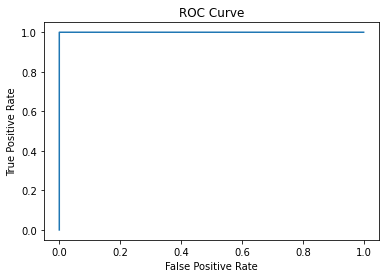

In [149]:
from sklearn.metrics import confusion_matrix, roc_curve
import matplotlib.pyplot as plt

# binarize at 0.5
pred_labels = (preds if 'preds' in locals() else best_model.predict_proba(X_test)[:,1]) > 0.5
print(confusion_matrix(test['Label'], pred_labels))

fpr, tpr, _ = roc_curve(test['Label'], preds if 'preds' in locals() else best_model.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


In [12]:
# # Exporting the dataset to csv
# feature_dfs.to_csv('../data/masterdata_ta.csv', index = False)